# Project 1

In [1]:
import os
import re
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def translate_image(image_path, output_path, dx, dy):
    img = cv.imread(image_path, 0)
    rows, cols = img.shape
    
    M = np.float32([[1, 0, dx], [0, 1, dy]])
    translated_img = cv.warpAffine(img, M, (cols, rows))
    
    plt.imshow(translated_img, cmap='gray')
    plt.title("Translated Image")
    plt.show()

def reflect_image(image_path, output_path):
    img = cv.imread(image_path, 0)
    rows, cols = img.shape
    
    M = np.float32([[1, 0, 0], [0, -1, rows]])
    reflected_img = cv.warpAffine(img, M, (cols, rows))

    plt.imshow(reflected_img, cmap='gray')
    plt.title("Reflected Image")
    plt.show()

def rotate_image(image_path, output_path, angle, scale):
    img = cv.imread(image_path, 0)
    rows, cols = img.shape
    
    M = cv.getRotationMatrix2D((cols/2, rows/2), angle, scale)
    rotated_img = cv.warpAffine(img, M, (cols, rows))

    plt.imshow(rotated_img, cmap='gray')
    plt.title("Rotated Image")
    plt.show()

def crop_image(image_path, output_path, x1, y1, x2, y2):
    img = cv.imread(image_path, 0)
    cropped_img = img[y1:y2, x1:x2]
    
    plt.imshow(cropped_img, cmap='gray')
    plt.title("Cropped Image")
    plt.show()

def shear_image(image_path, output_path, shear_factor):
    img = cv.imread(image_path, 0)
    rows, cols = img.shape
    
    M = np.float32([[1, shear_factor, 0], [0, 1, 0], [0, 0, 1]])
    sheared_img = cv.warpPerspective(img, M, (int(cols*1.5), int(rows*1.5)))
    
    plt.imshow(sheared_img, cmap='gray')
    plt.title("Sheared Image")
    plt.show()

def shear_image_y(image_path, output_path, shear_factor):
    img = cv.imread(image_path, 0)
    rows, cols = img.shape
    
    M = np.float32([[1, 0, 0], [shear_factor, 1, 0], [0, 0, 1]])
    sheared_img = cv.warpPerspective(img, M, (int(cols*1.5), int(rows*1.5)))
    
    plt.imshow(sheared_img, cmap='gray')
    plt.title("Sheared Image (Y-Axis)")
    plt.show()

def apply_blur(image_path, output_path, blur_type):
    img = cv.imread(image_path)
    
    if blur_type == 'Gaussian':
        blurred_img = cv.GaussianBlur(img, (7, 7), 0)
    elif blur_type == 'Median':
        blurred_img = cv.medianBlur(img, 5)
    elif blur_type == 'Bilateral':
        blurred_img = cv.bilateralFilter(img, 9, 75, 75)
    else:
        print("Invalid blur type.")
        return
    
    plt.imshow(cv.cvtColor(blurred_img, cv.COLOR_BGR2RGB))
    plt.title(f"{blur_type} Blurred Image")
    plt.show()



In [3]:
# Function to validate email
def validate_email(email):
    email_pattern = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
    return re.match(email_pattern, email) is not None

# Function to validate age
def validate_age(age):
    return age >= 18

def format_title(title):
    return ' '.join(word.capitalize() for word in title.split('-'))


# Function to display categories
def display_categories():
    categories = ['Traditional Art', 'Modern Art', 'Contemporary Art']
    for i, category in enumerate(categories, 1):
        print(f"{i}. {category}")

def display_images(category):
    category = category.lower().replace(" ", "-")
    category_folder = f"../images/project-images/{category}/"
    images = sorted(os.listdir(category_folder))  # Sort images alphabetically
    num_images = len(images)

    # Calculate the number of rows and columns for the grid
    num_cols = 4  # Adjust as needed
    num_rows = (num_images - 1) // num_cols + 1

    # Display images in a grid
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))
    for i, ax in enumerate(axes.flat):
        if i < num_images:
            img = cv2.imread(category_folder + images[i])
            ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            ax.set_title(f"{i + 1}. {format_title(images[i])}")
            ax.axis('off')
        else:
            ax.axis('off')  # Hide empty subplots

    plt.tight_layout()
    plt.show()
    return images


def select_image(images):
    while True:
        choice = input("Enter the number of the image you want to transform (or 'exit' to quit): ")
        if choice.lower() == 'exit':
            return None
        if choice.isdigit():
            index = int(choice) - 1
            if 0 <= index < len(images):
                print(f"\nYou have selected image {index + 1}: {images[index]}")
                return images[index]
        print("Invalid input. Please enter a valid image number.")

In [4]:
# Function to perform image transformation
def perform_transformation(image_path, transformation):
    img = cv2.imread(image_path)
    transformed_img = None
    
    transformations = {
        1: 'Translate',
        2: 'Reflect',
        3: 'Rotate',
        4: 'Crop',
        5: 'Shear',
        6: 'Shear Y',
        7: 'Gaussian Blur',
        8: 'Median Blur',
        9: 'Bilateral Blur'
    }

    # Check if the transformation option exists
    if transformation not in transformations:
        print("Invalid transformation option.")
        return

    # Execute the selected transformation
    if transformation == 1:
        dx = int(input("Enter translation along x-axis (pixels): "))
        dy = int(input("Enter translation along y-axis (pixels): "))
        transformed_img = translate_image(img, dx, dy)
        
    elif transformation == 2:
        transformed_img = reflect_image(img)
        
    elif transformation == 3:
        angle = float(input("Enter rotation angle (degrees): "))
        scale = float(input("Enter scale factor: "))
        transformed_img = rotate_image(img, angle, scale)
        
    elif transformation == 4:
        x1 = int(input("Enter starting x-coordinate for cropping: "))
        y1 = int(input("Enter starting y-coordinate for cropping: "))
        x2 = int(input("Enter ending x-coordinate for cropping: "))
        y2 = int(input("Enter ending y-coordinate for cropping: "))
        transformed_img = crop_image(img, x1, y1, x2, y2)
        
    elif transformation == 5:
        shear_factor = float(input("Enter shear factor: "))
        transformed_img = shear_image(img, shear_factor)
        
    elif transformation == 6:
        shear_factor = float(input("Enter shear factor along y-axis: "))
        transformed_img = shear_image_y(img, shear_factor)
        
    elif transformation == 7:
        transformed_img = apply_blur(img, 'Gaussian')
        
    elif transformation == 8:
        transformed_img = apply_blur(img, 'Median')
        
    elif transformation == 9:
        transformed_img = apply_blur(img, 'Bilateral')
    
    # Display the original and transformed images side by side
    if transformed_img is not None:
        # Plot the original image
        plt.subplot(1, 2, 1)
        plt.title("Original Image")
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

        # Plot the transformed image
        plt.subplot(1, 2, 2)
        plt.title(f"{transformations[transformation]} Image")
        plt.imshow(cv2.cvtColor(transformed_img, cv2.COLOR_BGR2RGB))
        plt.show()


Enter your email: o@gmail.com
Enter your age: 22
Welcome to the Yemisi Shyllon Museum of Art!

Please select a category:
1. Traditional Art
2. Modern Art
3. Contemporary Art

Enter the number of the category you're interested in: 3

Displaying images from Contemporary Art category:


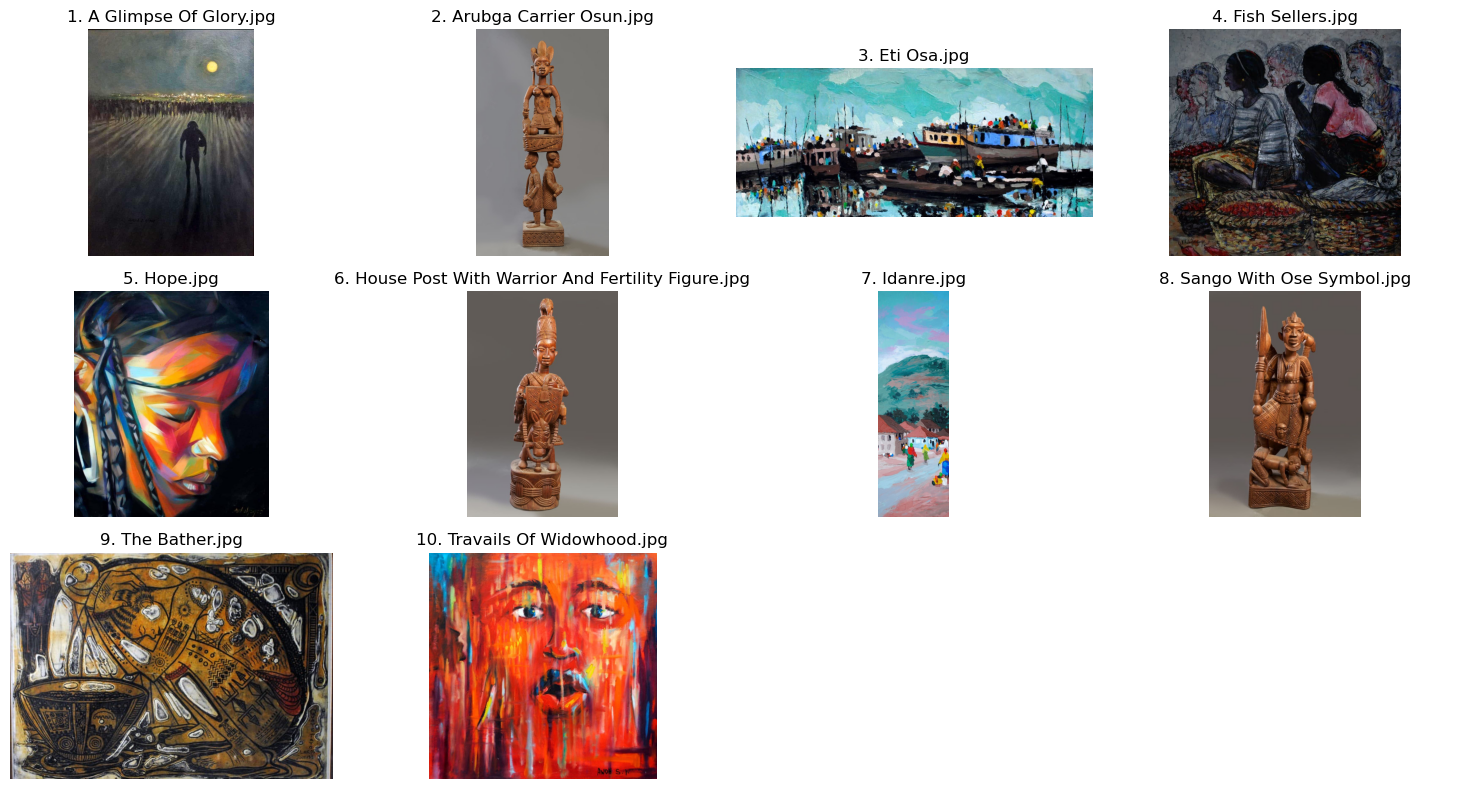

Enter the number of the image you want to transform (or 'exit' to quit): 2

You have selected image 2: arubga-carrier-osun.jpg

Available transformations:
1. Translate
2. Reflect
3. Rotate
4. Crop
5. Shear
6. Shear Y
7. Gaussian Blur
8. Median Blur
9. Bilateral Blur

Enter the number of the transformation you want to apply: 2
2  9
Applying Reflect transformation to arubga-carrier-osun.jpg:
Invalid transformation option.


In [ ]:
def get_numeric_input(prompt, error_message=None):
    while True:
        try:
            value = int(input(prompt))
            return value
        except ValueError:
            if error_message:
                print(error_message)
            else:
                print("Invalid input. Please enter a number.")

valid_email = False
while not valid_email:
    email = input("Enter your email: ")
    valid_email = validate_email(email)
    if not valid_email:
        print("Invalid email. Please try again.")

age = get_numeric_input("Enter your age: ", "Age must be a valid number.")

if age < 18:
    print("You must be 18 or older to access the application.")
else:
    print("Welcome to the Yemisi Shyllon Museum of Art!")
    print("\nPlease select a category:")
    display_categories()
    category_choice = get_numeric_input("\nEnter the number of the category you're interested in: ")

    category_map = {1: 'Traditional Art', 2: 'Modern Art', 3: 'Contemporary Art'}
    selected_category = category_map.get(category_choice)

    if selected_category:
        print(f"\nDisplaying images from {selected_category} category:")
        images = display_images(selected_category)

        while True:
            selected_image = select_image(images)
            if not selected_image:
                break

            print("\nAvailable transformations:")
            transformations = [
                'Translate', 'Reflect', 'Rotate', 'Crop', 
                'Shear', 'Shear Y', 'Gaussian Blur', 
                'Median Blur', 'Bilateral Blur'
            ]
            
            for i, transformation in enumerate(transformations, 1):
                print(f"{i}. {transformation}")
                
            transformation_choice = get_numeric_input("\nEnter the number of the transformation you want to apply: ")
            
            if 1 <= transformation_choice <= len(transformations):
                selected_transformation = transformations[transformation_choice - 1]
                print(f"Applying {selected_transformation} transformation to {selected_image}:")
                perform_transformation(f"./{selected_category}/{selected_image}", selected_transformation)
            else:
                print("Invalid transformation choice. Please try again.")

    else:
        print("Invalid category choice. Please try again.")